In [4]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
def sti(inf, sup):
    return np.append(-inf, sup)

def sti_inv(sti):  
    mid_idx = sti.shape[0] // 2
    return -sti[:mid_idx], sti[mid_idx:]

def sti_mul_mtx(matrix):
    pos = matrix.copy()
    neg = matrix.copy()
    pos[pos < 0] = 0
    neg[neg > 0] = 0
    neg = np.fabs(neg)
    return np.block([[pos, neg], [neg, pos]])



def generate_right_part(matrix):
    n = matrix.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = np.dot(matrix, x)  
    rads = np.random.uniform(low=0.5, high=2, size=n) 
    b_inf = b - rads 
    b_sup = b + rads
    return b_inf, b_sup, x

def get_right_part(matrix, min_index_b, max_index_b):
    b = np.loadtxt('b25636.txt')
    n = matrix.shape[0]
    x = np.random.uniform(low=1, high=5, size=n)
    b = b[min_index_b:max_index_b]
    rads = np.random.uniform(low=0.5, high=2, size=n) 
    b_inf = b - rads 
    b_sup = b + rads
    return b_inf, b_sup, x , b

def find_matrix(matrix, size):
    M = matrix
    indexes = []

    for i, col in enumerate(M.T):
        if np.fabs(col).sum() > 0:
            indexes.append(i)
    M = M.T[indexes].T

    size = min(M.shape[0], M.shape[1], size)
    while size > 0:
        s = 0
        for i in range(M.shape[0] - size + 1):
            s = 0
            for j in range(M.shape[1] - size + 1):
                s = 0
                if np.linalg.matrix_rank(M[i:i+size, j:j+size]) == size:
                    print(j)
                    break

                s+=1

            if s == 0:
                print(i)
                break


        if s == 0:
            print(size)
            break

        size -=1
    
    return M[i:i+size, j:j+size], i , i+size

In [6]:
A = np.array([[1 , 1],
             [0, 0.1]])

b_inf = np.array([4.1, 0.1])
b_sup = np.array([3.9, 0.3])

A_block = sti_mul_mtx(A)
result = np.dot(np.linalg.inv(A_block), sti(b_inf,b_sup))
result = sti_inv(result)
print(result)

(array([3.1, 1. ]), array([0.9, 3. ]))


22
0
14
[[-10144.5866217   10146.0866217 ]
 [-19441.8651202   19442.86512021]
 [  1599.22979706  -1598.72979706]
 [  1600.05842443  -1599.05842443]
 [  2039.67727325  -2038.17727325]
 [ -1854.13969097   1855.63969097]
 [ -1086.69177903   1087.69177903]
 [   168.5675905    -168.0675905 ]
 [  4487.10840643  -4487.10840643]
 [  4498.33872029  -4497.83872029]
 [  4642.46156505  -4641.46156505]
 [  6130.81735232  -6129.81735232]
 [  4953.27754419  -4952.77754419]
 [  9228.37273463  -9228.37273463]]


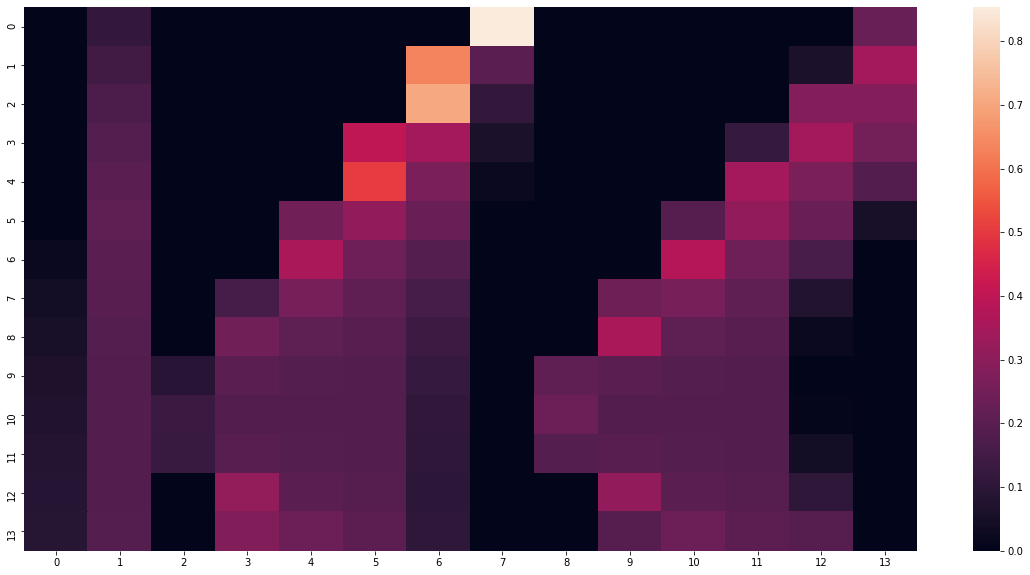

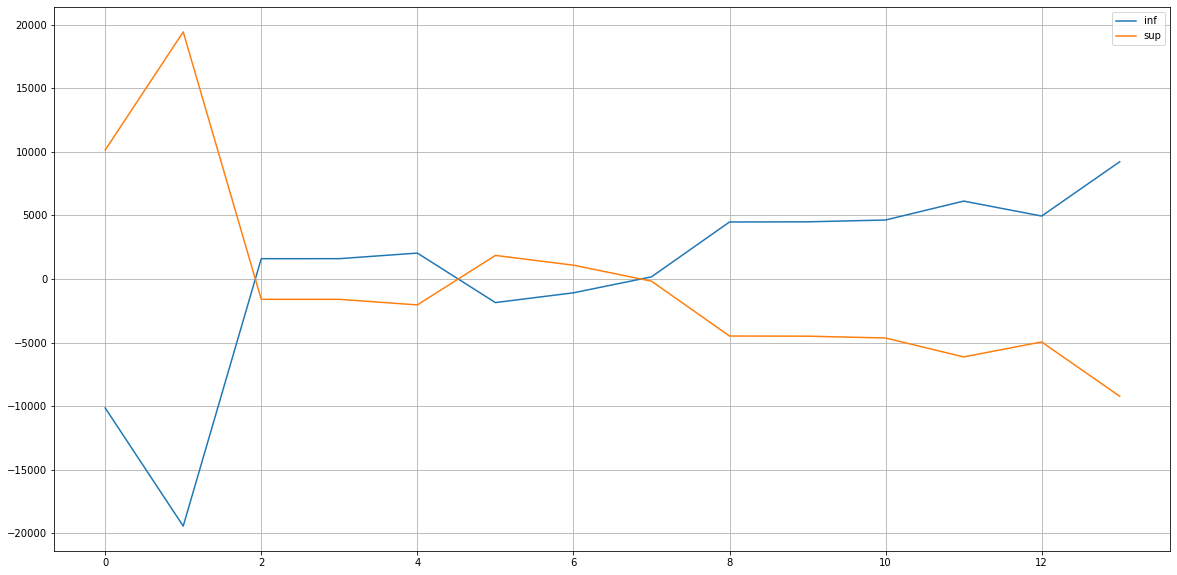

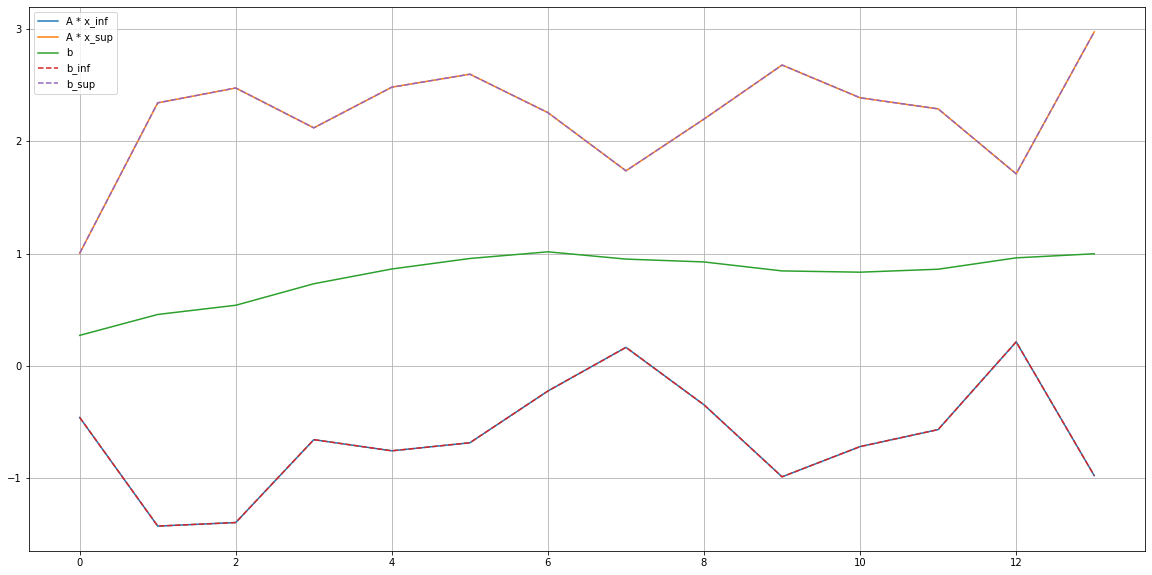

In [18]:
A2 = np.loadtxt('matrix_n_phi_1.txt')
A2, min_index_b, max_index_b = find_matrix(A2,size = 14)
b_inf, b_sup, x , b = get_right_part(A2, min_index_b, max_index_b)
sti_vec = sti(b_inf, b_sup)
A_block2 = sti_mul_mtx(A2)

res = np.dot(np.linalg.inv(A_block2), sti_vec)

res = sti_inv(res)
print(np.array(res).T)
plt.figure(figsize=(20,10))
sns.heatmap(A2)
plt.show()
plt.figure(figsize=(20,10))

plt.plot(res[0],label="inf")
plt.plot(res[1],label="sup")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(np.dot(A2, res[0]), label='A * x_inf')
plt.plot(np.dot(A2, res[1]), label='A * x_sup')
plt.plot(b, label='b')
plt.plot(b_inf, label='b_inf', ls='--')
plt.plot(b_sup, label='b_sup', ls='--')
plt.legend()
plt.grid()
plt.show()

103
84
19
[[ -169.24698152   171.37538066]
 [ -284.43053351   286.56265415]
 [ -385.7658036    385.12462671]
 [   29.64998742   -29.8243036 ]
 [ -269.2993445    271.57735842]
 [-1574.79677515  1571.35600424]
 [-1376.84784459  1371.99364805]
 [ -408.27230707   403.93787793]
 [  189.25985553  -184.28583012]
 [ 1060.09768108 -1057.44443701]
 [  215.3129401   -216.67301631]
 [ -413.65720972   414.15720972]
 [   -9.58785469    10.8964507 ]
 [   14.25572106   -12.51363329]
 [  887.82250849  -873.03173049]
 [  138.82982829  -137.3262833 ]
 [   92.24186011   -91.74186011]
 [  -28.67510601    29.17510601]
 [    9.00286172    -7.83073636]]


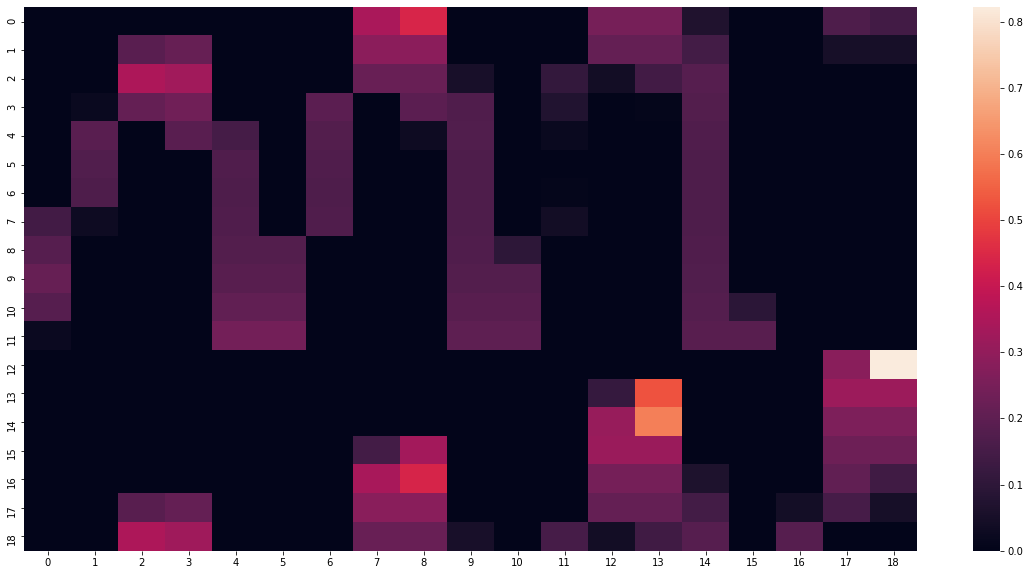

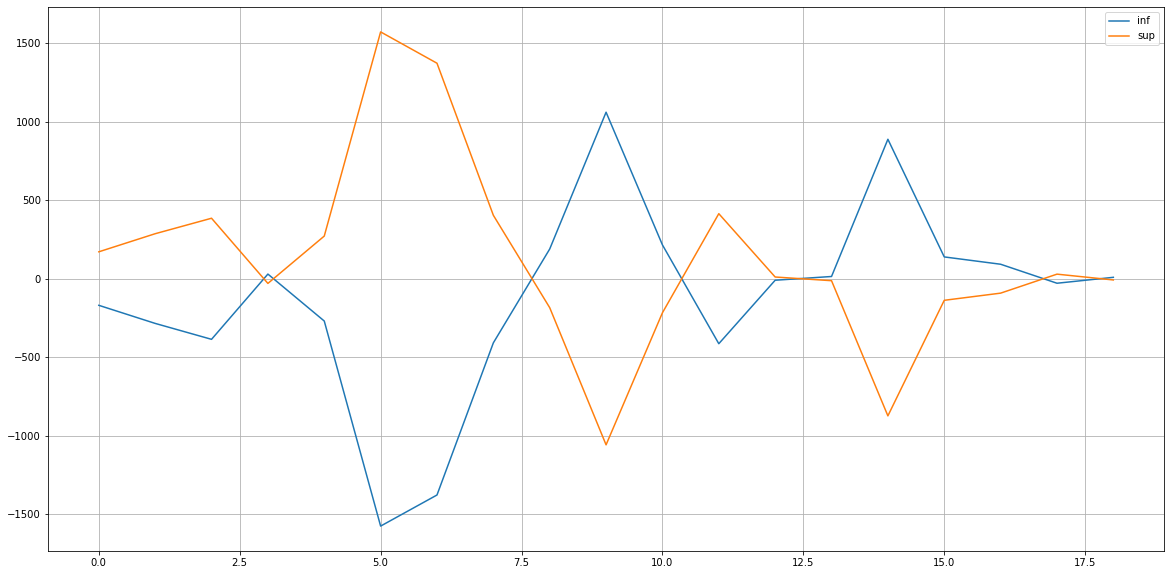

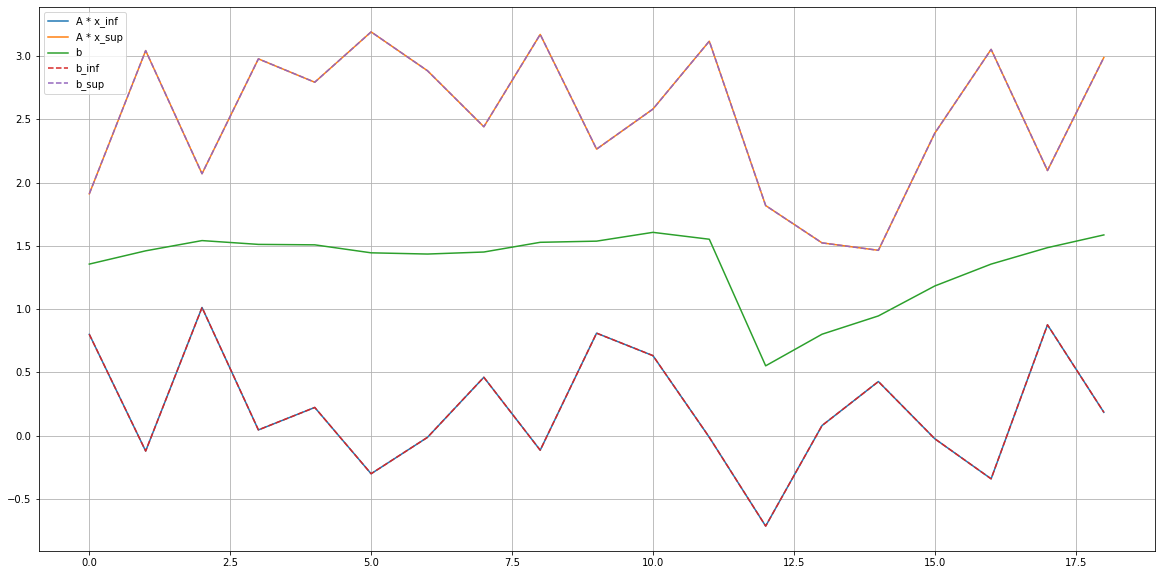

In [19]:
A3 = np.loadtxt('matrix_n_phi_6.txt')
A3,min_index_b3, max_index_b3 =  find_matrix(A3,size = 19)
b_inf3, b_sup3, x3 , b3 = get_right_part(A3,min_index_b3, max_index_b3)
sti_vec3 = sti(b_inf3, b_sup3)
A_block3 = sti_mul_mtx(A3)

res3 = np.dot(np.linalg.inv(A_block3), sti_vec3)

res3 = sti_inv(res3)
print(np.array(res3).T)
plt.figure(figsize=(20,10))
sns.heatmap(A3)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(res3[0],label="inf")
plt.plot(res3[1],label="sup")
plt.legend()
plt.grid()
plt.show()
plt.figure(figsize=(20,10))
plt.plot(np.dot(A3, res3[0]), label='A * x_inf')
plt.plot(np.dot(A3, res3[1]), label='A * x_sup')
plt.plot(b3, label='b')
plt.plot(b_inf3, label='b_inf', ls='--')
plt.plot(b_sup3, label='b_sup', ls='--')
plt.legend()
plt.grid()
plt.show()

(array([3.68466703, 4.33831656, 3.21541464, 1.45350653, 3.34658922,
        4.20976585, 3.37523424, 1.72411108, 2.86082445, 2.78074815,
        3.53450641, 2.75536087, 2.4180915 , 3.96663797, 4.1239072 ,
        3.43107027, 0.8177097 , 3.24212353, 1.68296323, 0.80174404,
        0.88119413, 1.90578161, 3.66677145, 4.02291868, 2.77793373,
        4.22476781, 2.24294513, 1.82570333, 1.59821454, 0.9763834 ,
        3.69459854, 4.38432968, 3.44730943, 3.67389039, 0.97048829,
        2.170861  ]),
 array([4.73718001, 5.45030966, 3.35361158, 1.6164818 , 4.36080219,
        5.61748859, 4.15722209, 2.25282196, 3.18551467, 3.87129212,
        3.58417579, 2.64041201, 2.3929925 , 4.83892583, 4.10491953,
        3.61673621, 1.38126851, 4.32373763, 1.93754208, 2.41975958,
        2.27555599, 2.16909533, 3.81321135, 4.81043314, 3.33936399,
        4.8851394 , 2.79884903, 2.38494954, 1.68244401, 1.67999649,
        4.88585878, 4.42539011, 5.45916863, 3.99392486, 1.34600816,
        4.08386542]))